# Bienvenido a tu primer competencia de ciencia de datos!!!

En este notebook desarrollaremos el problema del Titanic. Este dataset es el más popular entre todos los que quieren iniciar en este mundo de la Ciencia de Datos. Básicamente se busca predecir si un pasajero, con ciertas caractéristicas, sobrevivió o no a esta trEdaddia ocurrida en el siglo 20. 

Recuerda que para comenzar a hacer el análisis,  tenemos que involucrarnos con el problema en sí y conocer nuestra data. Así que comencemos! 


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd  #Sirve para manejar y manipular la data en forma de dataframe
import numpy as np #Calculos vectoriales que pueden ser aplicados al dataframe
import matplotlib.pyplot as plt #Para darle estructura y desplegar el gráfico 
import seaborn as sns #Para hacer el gráfico todo bonito y chulo 
import random #Una librería para randomizar 

#En este notebook usaremos:

import missingno as ms #Librería muy útil para ver los valores nulos

#Usualmente salen advertencias de actualizaciones pasadas de las librerías, las ignoramos por ahora...
import warnings
warnings.filterwarnings('ignore')

C:\Users\pablo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


En este caso, tenemos dos tablas de datos: train y summit (test.csv). Ahora, esta data ha sido sacada de una **competencia de Kaggle** Por eso, la data que nombraremos como **summit contendrá la base para poder aplicar nuestro modelo ya completado**. El mismo Kaggle se encargará de saber si es un buen modelo o no. Posteriormente, esta tabla nombrada **train nos servirá tanto para entrenar como para testear nuestro modelos**. Así que no te sorprendas si es que más adelante dividimos este train en dos dataframes diferentes...

El link de la competencia es: https://www.kaggle.com/c/titanic

In [0]:
train = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/Titanic/train.csv')

summit = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/Titanic/test.csv')

In [0]:
#head
train.head(2)

,IdPasajero,Sobrevivio,Pclass,Name,Genero,Edad,Hermanos,Padres_hijos,Ticket,Tarifa,Cabin,P_embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [0]:
summit.head(2)

,IdPasajero,Pclass,Name,Genero,Edad,Hermanos,Padres_hijos,Ticket,Tarifa,Cabin,P_embarque
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


#### Dénse cuenta de la diferencia entre train y summit. El primero tiene Sobrevivió como una variable.

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IdPasajero    891 non-null    int64  
 1   Sobrevivio    891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Genero        891 non-null    object 
 5   Edad          714 non-null    float64
 6   Hermanos      891 non-null    int64  
 7   Padres_hijos  891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Tarifa        891 non-null    float64
 10  Cabin         204 non-null    object 
 11  P_embarque    889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
summit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IdPasajero    418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Name          418 non-null    object 
 3   Genero        418 non-null    object 
 4   Edad          332 non-null    float64
 5   Hermanos      418 non-null    int64  
 6   Padres_hijos  418 non-null    int64  
 7   Ticket        418 non-null    object 
 8   Tarifa        417 non-null    float64
 9   Cabin         91 non-null     object 
 10  P_embarque    418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
#Loc y iloc
train.loc[5,'Genero']

'male'

In [0]:
train.iloc[5,5:]

Padres_hijos         0
Tarifa          8.4583
P_embarque           Q
Name: 5, dtype: object

In [0]:
# for loops. Cómo podríamos visualizar los nulos? 
train['Edad'].isna().sum()

177

**Explicaremos las variables que están dentro de la data**

**Pclass**: Status socioeconómico 1st = ClaseAlta 2nd=ClaseMedia 3rd=ClaseBaja 

**Hermanos**: El dataset define relaciones familiares, es decir, nos dice el número de hermanos.

**Padres_hijos**: Número de padres / hijos dentro del Titanic

**Esposo_esposa** = marido / Mujer (se obvia novias o enamoradas)

**Tarifa**: El costo del ticket que se compró para el pasaje

**Sobrevivio**: Si la persona sobrevivió o no.	0 = No, 1 = Sí

**Ticket***: La clase de ticket que sacó el pasajero.

**P_embarque**: Puerta de embarcación,	C = Cherbourg, Q = Queenstown, S = Southampton

**Cabin**: El número de cabina

In [0]:
print('Para la data en train, tendremos:')
print('--------------------------------------------------------------------------------------------')
for n in train.columns:
    print('El número de valores diferentes en la columna', n, 'es:', len(train[n].unique()))
print('--------------------------------------------------------------------------------------------')
#Ahora buscaremos el número de valores nulos dentro de la data
for n in train.columns:
    if train[n].isnull().values.any() == True:
        print('Existen' , train[n].isna().sum(), 'valores nulos en la columna', n)

Para la data en train, tendremos:
--------------------------------------------------------------------------------------------
El número de valores diferentes en la columna IdPasajero es: 891
El número de valores diferentes en la columna Sobrevivio es: 2
El número de valores diferentes en la columna Pclass es: 3
El número de valores diferentes en la columna Name es: 891
El número de valores diferentes en la columna Genero es: 2
El número de valores diferentes en la columna Edad es: 89
El número de valores diferentes en la columna Hermanos es: 7
El número de valores diferentes en la columna Padres_hijos es: 7
El número de valores diferentes en la columna Ticket es: 681
El número de valores diferentes en la columna Tarifa es: 248
El número de valores diferentes en la columna Cabin es: 148
El número de valores diferentes en la columna P_embarque es: 4
--------------------------------------------------------------------------------------------
Existen 177 valores nulos en la columna Edad
E

In [0]:
print('Para la data que summitearemos, tendremos:')
print('-------------------------------------------------------------------------------')
for n in summit.columns:
    print('El número de valores diferentes en la columna', n, 'es:', len(summit[n].unique()))
print('-------------------------------------------------------------------------------')
#Ahora buscaremos el número de valores nulos dentro de la data
for n in summit.columns:
    if summit[n].isnull().values.any() == True:
        print('Existen' , summit[n].isna().sum(), 'valores nulos en la columna', n)

Para la data que summitearemos, tendremos:
-------------------------------------------------------------------------------
El número de valores diferentes en la columna IdPasajero es: 418
El número de valores diferentes en la columna Pclass es: 3
El número de valores diferentes en la columna Name es: 418
El número de valores diferentes en la columna Genero es: 2
El número de valores diferentes en la columna Edad es: 80
El número de valores diferentes en la columna Hermanos es: 7
El número de valores diferentes en la columna Padres_hijos es: 8
El número de valores diferentes en la columna Ticket es: 363
El número de valores diferentes en la columna Tarifa es: 170
El número de valores diferentes en la columna Cabin es: 77
El número de valores diferentes en la columna P_embarque es: 3
-------------------------------------------------------------------------------
Existen 86 valores nulos en la columna Edad
Existen 1 valores nulos en la columna Tarifa
Existen 327 valores nulos en la column

## Missingno: Una forma más interactiva de ver mis nulos.

Esta librería nos grafica nuestro dataframe de tal manera en la que vemos qué columnas tienen datos vacíos. Esto es representado por los espacios en blanco que tenemos. Es más intuitivo y fácil de mapear cuáles son los problemas de los nulos dentro de nuestro dataset. 

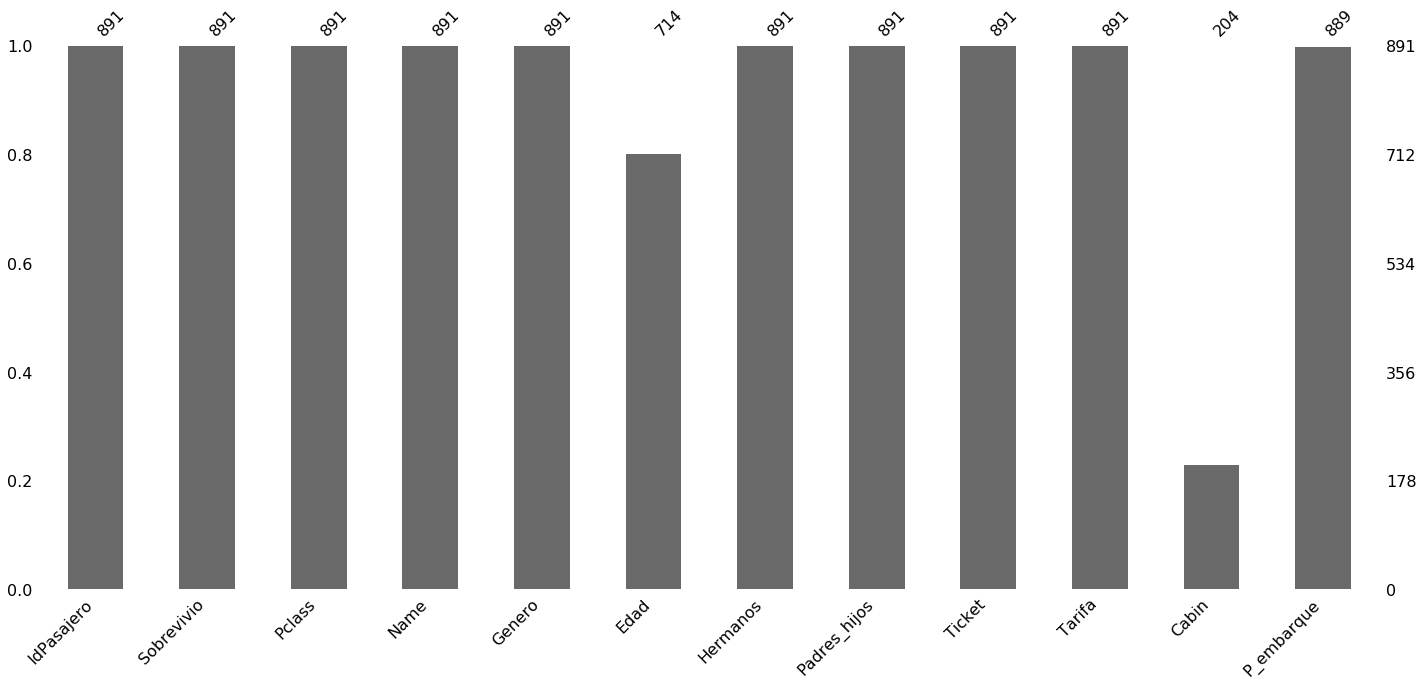

In [0]:
#Nulo de train
ms.bar(train)

In [0]:
#Nulos de summit

**Eliminaremos** los valores que nos parecen **irrelevantes** para predecir si una persona sobrevive o no dentro del Titanic. En este caso, intuimos que son:

- Nombre: ¿Qué tiene que ver el nombre con que se sobreviva o no?


- Ticket: Si bien se podría pensar que el ticket nos daría algún criterio, en este caso no se ha encontrado una relación directa. Ah pero eso no quita que la podamos usar. Puedes ponerte creativo y sacar una conclusión!


- PassengerId: Lo mismo que la variable Ticket. Asumimos que no tiene relación con la supervivencia y lo quitamos.

In [0]:
train.drop(['Name','Ticket','IdPasajero','Cabin'], axis = 1,inplace=True)
summit = summit.drop(['Name','Ticket','IdPasajero','Cabin'], axis = 1)

#### Explicaremos brevemente cómo filtrar datos dentro de un dataframe (mask method) 

In [0]:
#Máscaras generales
mask = (train['Edad'] >= 60)
train[mask].shape

(26, 8)

In [0]:
#Máscara general: pregunta 2


## Reemplazando Nulos: 

Un valor Nulo no es más que data que no ha sido recogida (o imputada), osea **data vacía**. Esta nulidad puede deberse a diferentes casos y las maneras en las que podemos lidiar con ellos son varias. La forma en cómo podemos tratar con este tipo de variable depende de diferentes factores como la cantidad, la dispersión y la importancia de la variable para el target (recuerda que target es la variable que vamos a predecir). 



Ahora llenaremos los valores NaN de las columnas Edad y P_embarque. En la columna Edad llenaremos de manera random definiendo un intervalo en el que nuestra data va iterar. Ese intervalo será definido por **(media +- DesviaciónEstandar)**

In [0]:
#media y std
#train['P_embarque'] no tiene MEDIA
train['Edad'].std()

14.526497332334044

In [0]:
print("La edad media de nuestro train dataset es:",train['Edad'].mean(),"\nLa desviación estandar de la edad de nuestro train dataset es:",train['Edad'].std())
print("La edad media de nuestro summitdataset es:",summit['Edad'].mean(),"\nLa desviación estándar de la edad de nuestro summites:",summit['Edad'].std())

La edad media de nuestro train dataset es: 29.69911764705882 
La desviación estandar de la edad de nuestro train dataset es: 14.526497332334044
La edad media de nuestro summitdataset es: 30.272590361445783 
La desviación estándar de la edad de nuestro summites: 14.18120923562442


In [0]:
#Quantiles y moda(con plot)
train['Edad'].quantile(.99)

65.87

In [0]:
train['Edad'].mode()[0]

24.0

##### Crearemos una función para llenarlo automáticamente:

Recuerda que una función es...

. Un conjunto lógico de código que se une para hacerlo generalizado.


. Una función tiene parámetros necesarios al llamarlo y a su vez parámetros por default que pueden ser alterados.



### Punto de decisión!!!

Acá vas a poder decidir entre dos métodos!! 

- Llenar los nulos con la media directamente en una línea de código.

- LLenar los nulos randomizando por sobre un intervalo definido por la media y la desv.estándar. 

In [0]:
#Cuáles son las columnas que tienen valores nulos?
train.isna().any()

Sobrevivio      False
Pclass          False
Genero          False
Edad             True
Hermanos        False
Padres_hijos    False
Tarifa          False
P_embarque       True
dtype: bool

In [0]:
summit.isna().any()

Pclass          False
Genero          False
Edad             True
Hermanos        False
Padres_hijos    False
Tarifa           True
P_embarque      False
dtype: bool

Llenaremos primero la columna Edad

In [0]:
#SI QUIERES LLENARLO DE LA PRIMERA MANERA, CORRE ESTE CODIGO:

train['Edad'].fillna(int(train['Edad'].mean()),inplace=True)
summit['Edad'].fillna(int(summit['Edad'].mean()),inplace=True)


In [0]:
#SI QUIERES LLENARLO DE LA SEGUNDA MANERA, CORRE ESTE CODIGO. Pero desbloquealo primero:

#Crearemos una función para llenar de manera random dentro del intervalo de la media y desv stand (std)
def llena_nan_con_media_y_std(df,col='Edad'):
    nan = df[df[col].isna()] #el dataset de los que tienen la columna (col = 'Edad' ) con valores nulos
    min_ = df[col].mean() - df[col].std() #El comienzo de nuestro intervalo, la media menos la desv. estandar.
    max_ = df[col].mean() + df[col].std() #El final de nuestro intervalo, la media más la desv. estandar.
    for i in nan.index: #Para cada i en los index de mi data nula
        random_num = random.uniform(int(min_),int(max_)) #randomizo dentro de los intervalos que quiero y especifico que quiero enteros
        df[col].loc[i] = random_num #Reemplazo los valores dentro de mi data original.

In [0]:
llena_nan_con_media_y_std(train) #Aplico la función para train
llena_nan_con_media_y_std(summit) #Aplico la función para summit

Ahora tenemos que hacernos cargo de los valores nulos de la columna P_embarque y Tarifa dentro de los dos dataframes (summit y train)

In [0]:
train['P_embarque'].fillna('S',inplace=True)

A pesar de que podamos llenarlo con la moda directamente con fillna, prefiero ver con mis propios ojos qué tanto difiere la moda de su segundo valor más recurrente....

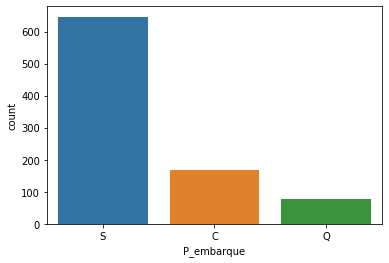

In [0]:
# Visualizaremos los datos de la columna P_embarque en nuestra data de entrenamiento. #countplot:
sns.countplot(train['P_embarque'])

In [0]:
# Ahora sí, podemos llenar los nulos de P_embarque de esta manera:
train['P_embarque'].fillna(train['P_embarque'].mode(), inplace=True)
summit['P_embarque'].fillna(train['P_embarque'].mode(), inplace=True)

In [0]:
#Ahora lo hacemos para el summit data (solamente el Tarifa, 1 dato nulo)
summit['Tarifa'].fillna(summit['Tarifa'].mean(),inplace=True)

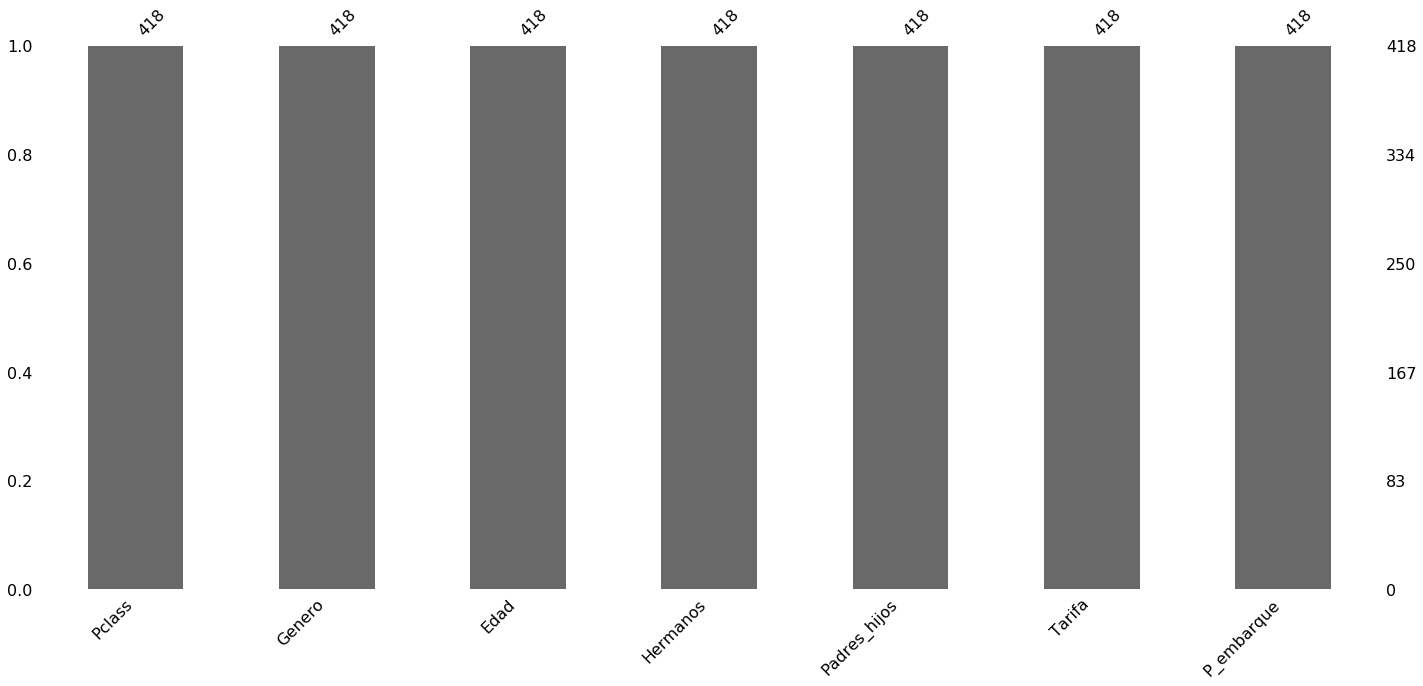

In [0]:
# Siguen habiendo nulos en nuestra data?
ms.bar(summit)

## Detectando y tratando outliers

- Uno de los mejores gráficos para poder ver los outliers es el **grafico de caja** o **boxplot** que nos grafica los cuantiles de la data y nos dice qué tan pronunciados son nuestros outliers con respecto a ellos.

In [0]:
plt.style.use('ggplot') #Es el estilo que le ponemos a la data
plt.figure(figsize=(4,6))
sns.boxplot(train['Edad'], orient="v") #El gráfico de distribución
plt.show()
plt.figure(figsize=(4,6))
sns.boxplot(train['Tarifa'], orient='v')
plt.show()

Viendo el boxplot, con la variable Edad no me haré tanto problema. Sino lo que me interesa reemplazar son los outliers de la variable 
Reemplazaremos los outliers de Tarifa por los valores que tengamos en el 95% de los datos:

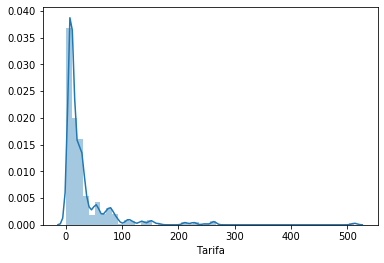

In [0]:
#Plotea la distribución de Tarifa
sns.distplot(train['Tarifa'])

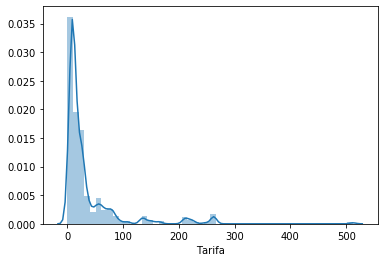

In [0]:
sns.distplot(summit['Tarifa'])

In [0]:
#Voy a reemplazar estos outliers por... 
train['Tarifa'].quantile(.95)

111.481225

In [0]:
#Reemplazando los outliers con los cuantiles 95 y etc

outliers_a_reemplazar = train[train['Tarifa'] > train['Tarifa'].quantile(.95)].index
train.loc[outliers_a_reemplazar,'Tarifa'] = train['Tarifa'].quantile(.95)

In [0]:
outliers_a_reemplazar = summit[summit['Tarifa']> summit['Tarifa'].quantile(.95)].index
summit.loc[outliers_a_reemplazar,'Tarifa'] = summit['Tarifa'].quantile(.95)

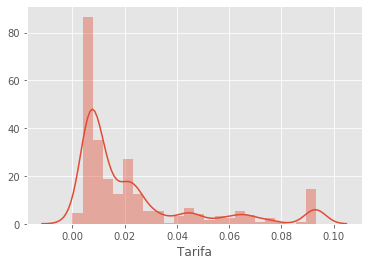

In [0]:
#Ploteemos denuevo Tarifa y Edad... Para ver un antes y un después
sns.distplot(train['Tarifa'])

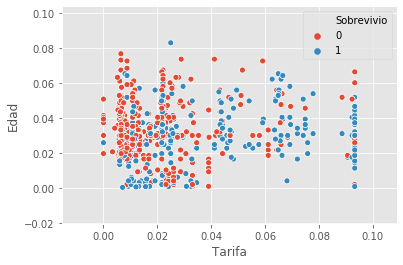

In [0]:
sns.scatterplot(x = train['Tarifa'] ,y = train['Edad'],hue=train['Sobrevivio'])

In [0]:
train['Tarifa'].shape

(891,)

#### Advertencia!!!  No siempre es la mejor opción... Podríamos crear otra variable para indicar que estamos reemplazando los datos._

## Podemos (y debemos) crear otros features a la data:

Hemos visto que hay dos variables que se relacionan a la familia del pasajero (Hermanos & Padres_hijos), asi que por qué no creamos una variable que resuma la cantidad de familiares de una persona? Y también contar si la persona viaja sola o acompañada en la nave.

In [0]:
#Creamos la variable miembros de familia. 

train['Miembros_de_fam'] = train['Hermanos'] + train['Padres_hijos'] + 1 #(1 reempresenta a él o ella)
summit['Miembros_de_fam'] = summit['Hermanos'] + summit['Padres_hijos'] + 1

#Crearemos la variable Alone para nuestra data
train['Viaja_solo'] = 1 
train['Viaja_solo'].loc[train['Miembros_de_fam'] > 1] = 0

summit['Viaja_solo'] = 1 
summit['Viaja_solo'].loc[summit['Miembros_de_fam'] > 1] = 1

In [0]:
train.head()

#### Dándole sentido a nuestra variable... 

**Pensando el problema**: ¿Qué es lo que pasa en un desastre natural? No le dan prioridad a las mujeres,niños y personas adultas? para que puedan ir directo a las naves de rescate? Entonces, sería conveniente identificar si el pasajero es Hombre, Mujer o **niño** Para esto, crearemos la variable niño. 

Pero **vas a tener que decidir** porque puedes:

- Crear una nueva categoría para identificar los niños dentro de la columna género

- Crear una columna extra donde nos diga si es niño = 1, si no es niño = 0

In [0]:
#RETO: Crear una variable dummy de niño o crear una variable en la que reemplaces la variable categórica dentro del género.

In [0]:
#Variable Dummy
train['es_niño'] = 0
train.loc[(train['Edad'])<15,'es_niño'] = 1

summit['es_niño'] = 0
summit.loc[(summit['Edad']<15),'es_niño'] = 1

In [0]:
#Si es que eligesm y lo quieres dentro de una columna en específico. 
train.loc[(train['Edad'] < 15),'Genero'] = 'niño'
summit.loc[(summit['Edad']<15),'Genero'] = 'niño'


In [0]:
#Si es que quiero saber quiénes son adultos, niños y ancianos... 
train.loc[(train['Edad']<=15), 'Categoria_edad'] = 'niño'
train.loc[(train['Edad'] > 15) & (train['Edad']<60),'Categoria_edad'] = 'adulto'
train.loc[(train['Edad']>=60),'Categoria_edad'] = 'anciano'

In [0]:
#Poniendo a los ancianos en una categoría más: 



## Data Visualization:

**Por qué es importante visualizar nuestros datos?**:

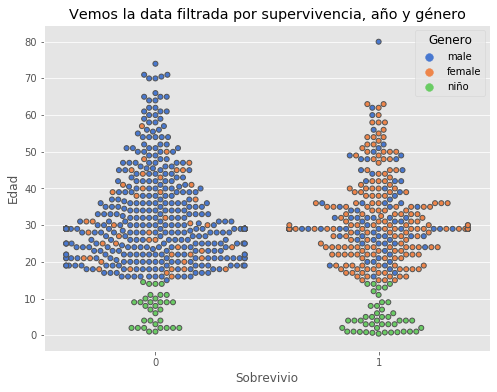

In [0]:
plt.style.use('ggplot') #Para ponerle el estilo tipo R
plt.figure(figsize=(8,6)) #Podemos modificar la imagen 
plt.title('Vemos la data filtrada por supervivencia, año y género') #Le ponemos título a la imagen
sns.swarmplot(x = 'Sobrevivio',y='Edad', 
              data=train, linewidth=1,hue='Genero', palette = 'muted')

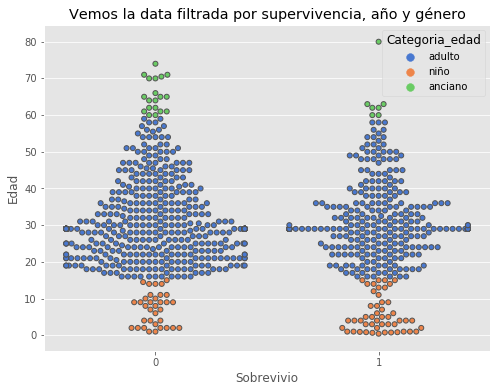

In [0]:
plt.style.use('ggplot') #Para ponerle el estilo tipo R
plt.figure(figsize=(8,6)) #Podemos modificar la imagen 
plt.title('Vemos la data filtrada por supervivencia, año y género') #Le ponemos título a la imagen
sns.swarmplot(x = 'Sobrevivio',y='Edad', 
              data=train, linewidth=1,hue='Categoria_edad', palette = 'muted')

In [0]:
plt.style.use('ggplot') #Para ponerle el estilo tipo R
plt.figure(figsize=(8,6)) #Podemos modificar la imagen 
plt.title('Vemos la data filtrada por supervivencia, año y género') #Le ponemos título a la imagen
sns.swarmplot(x = 'Sobrevivio',y='Edad', 
              data=train, linewidth=1,hue='Genero', palette = 'muted')

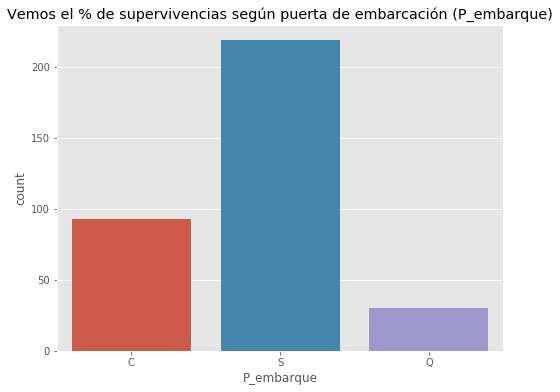

In [0]:
plt.figure(figsize=(8,6))
plt.title('Vemos el Nro de supervivencias según puerta de embarcación (P_embarque)')
sns.countplot(x = 'P_embarque', data = train[train['Sobrevivio'] == 1])

Con lo gráficos anteriores, ya tenemos una intuición acerca de **cómo deberíamos reemplazar los datos**, es decir, ahora podemos hacer el encoding de manera intuitiva.

In [0]:
#Ahora podemos decir qué prioridades de categorías hay dentro de las variables P_embarque y Genero
cat_to_nums = {"P_embarque":  {"S": 2, "C": 1, "Q":0},
               "Genero": {"male":0,"niño":1,"female":2}}
#Vamos a reemplazarlo en el train y en el summit

train.replace(cat_to_nums, inplace = True)
summit.replace(cat_to_nums, inplace = True)

In [0]:
train.head()

,Sobrevivio,Pclass,Genero,Edad,Hermanos,Padres_hijos,Tarifa,P_embarque,es_niño,Categoria_edad
0,0,3,0,22.0,1,0,7.2500,2,0,adulto
1,1,1,2,38.0,1,0,71.2833,1,0,adulto
2,1,3,2,26.0,0,0,7.9250,2,0,adulto
3,1,1,2,35.0,1,0,53.1000,2,0,adulto
4,0,3,0,35.0,0,0,8.0500,2,0,adulto


## Normalizando mi data:
Cuándo normalizar o standarizar?: https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

Veamos la distribución de nuestros dos datos netamente numéricos que tenemos:


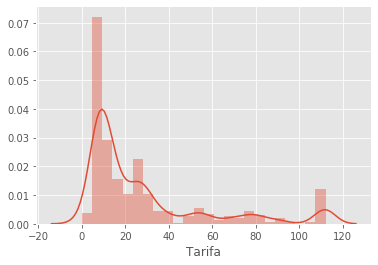

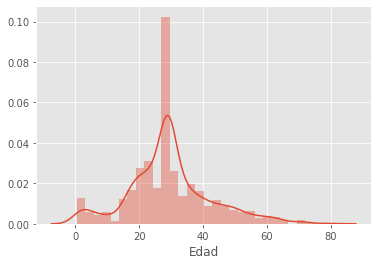

In [0]:
sns.distplot(train['Tarifa']) #El gráfico de distribución
plt.show()
sns.distplot(train['Edad'])
plt.show()

In [0]:
from sklearn.preprocessing import normalize #Para la normalización de la data.

In [0]:
# Normalizando 'Tarifa' & 'Edad' para summitear dataset y train
X_to_norm = [train['Tarifa'],
     train['Edad']] #Asigno las variables que quiero normalizar

X_normalize = normalize(X_to_norm) #Le aplico la normalización

X_2_to_norm = [summit['Tarifa'],
      summit['Edad']]  #El mismo procedimiento para el summir

X_2_normalize = normalize(X_2_to_norm)

#Asigno la variable normalizada a mi df

train = train.assign(Tarifa = X_normalize[0]) 

train = train.assign(Edad = X_normalize[1])

summit= summit.assign(Tarifa = X_2_normalize[0])

summit= summit.assign(Edad = X_2_normalize[1])

In [0]:
#Now we have all numerical values!
train.head()

,Sobrevivio,Pclass,Genero,Edad,Hermanos,Padres_hijos,Tarifa,P_embarque,es_niño,Categoria_edad
0,0,3,0,0.022824,1,0,0.006032,2,0,adulto
1,1,1,2,0.039423,1,0,0.059304,1,0,adulto
2,1,3,2,0.026974,0,0,0.006593,2,0,adulto
3,1,1,2,0.036311,1,0,0.044176,2,0,adulto
4,0,3,0,0.036311,0,0,0.006697,2,0,adulto


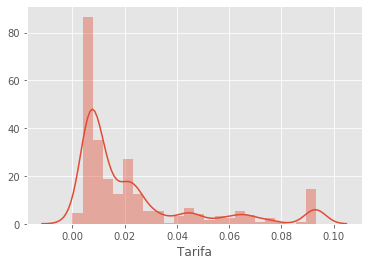

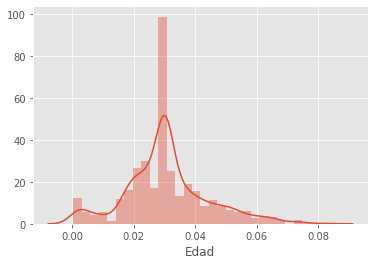

In [0]:
plt.style.use('ggplot') #Es el estilo que le ponemos a la data 
sns.distplot(train['Tarifa']) 
plt.show()
sns.distplot(train['Edad'])
plt.show()

## Guardamos nuestro trabajo hasta ahora

In [0]:
import dill

In [0]:
dill.dump_session('Titanic01.db')